
# RGB to HSV

This example illustrates how RGB to HSV (Hue, Saturation, Value) conversion
[1]_ can be used to facilitate segmentation processes.

Usually, objects in images have distinct colors (hues) and luminosities, so
that these features can be used to separate different areas of the image.
In the RGB representation the hue and the luminosity are expressed as a linear
combination of the R,G,B channels, whereas they correspond to single channels
of the HSV image (the Hue and the Value channels). A simple segmentation of the
image can then be effectively performed by a mere thresholding of the HSV
channels.

.. [1] https://en.wikipedia.org/wiki/HSL_and_HSV


In [1]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hsv

We first load the RGB image and extract the Hue and Value channels:



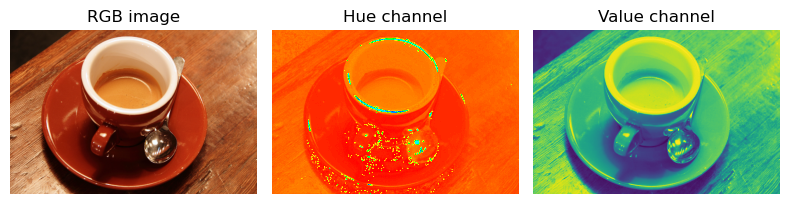

In [2]:
rgb_img = data.coffee()
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

We then set a threshold on the Hue channel to separate the cup from the
background:



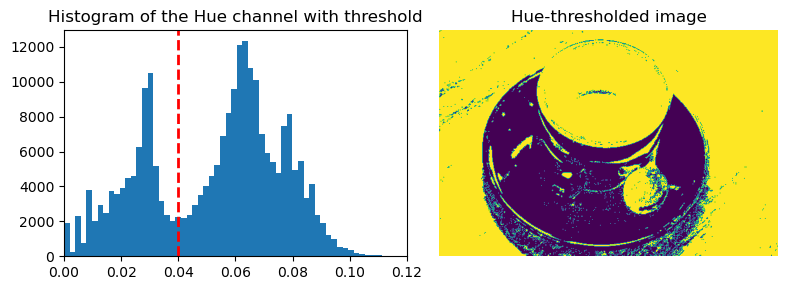

In [3]:
hue_threshold = 0.04
binary_img = hue_img > hue_threshold

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

ax0.hist(hue_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 0.12)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')

fig.tight_layout()

We finally perform an additional thresholding on the Value channel to partly
remove the shadow of the cup:



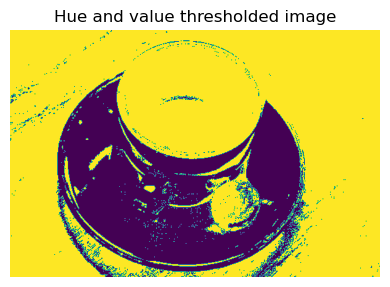

In [4]:
fig, ax0 = plt.subplots(figsize=(4, 3))

value_threshold = 0.10
binary_img = (hue_img > hue_threshold) | (value_img < value_threshold)

ax0.imshow(binary_img)
ax0.set_title("Hue and value thresholded image")
ax0.axis('off')

fig.tight_layout()
plt.show()